**Challenger disaster dataset.**

In [77]:
# Load the necessary packages
library(faraway)
library(mgcv)
library(ggplot2)

In [78]:
# Load the orings dataset
data(orings)
head(orings)

,temp,damage
,<dbl>,<dbl>
1,53,5
2,57,1
3,58,1
4,63,1
5,66,0
6,67,0


In [79]:
# Summary statistics for the dataset
summary(orings)

      temp           damage      
 Min.   :53.00   Min.   :0.0000  
 1st Qu.:67.00   1st Qu.:0.0000  
 Median :70.00   Median :0.0000  
 Mean   :69.57   Mean   :0.4783  
 3rd Qu.:75.00   3rd Qu.:1.0000  
 Max.   :81.00   Max.   :5.0000  

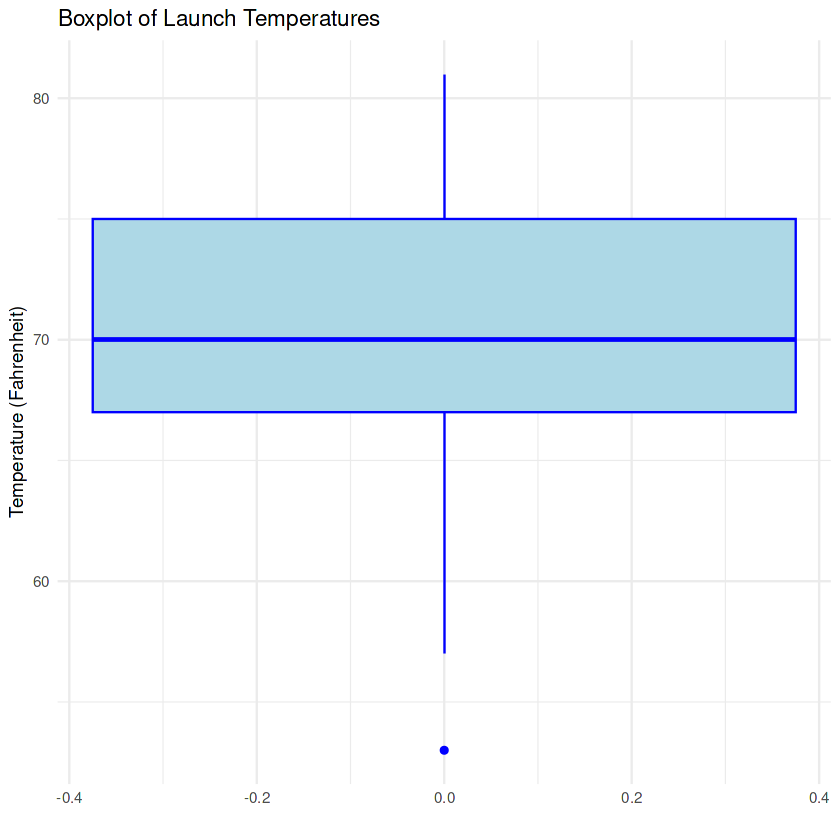

In [80]:
# Boxplot for the Temperature variable
ggplot(orings, aes(y = temp)) +
  geom_boxplot(fill = "lightblue", color = "blue") +
  theme_minimal() +
  labs(title = "Boxplot of Launch Temperatures",
       y = "Temperature (Fahrenheit)",
       x = "")

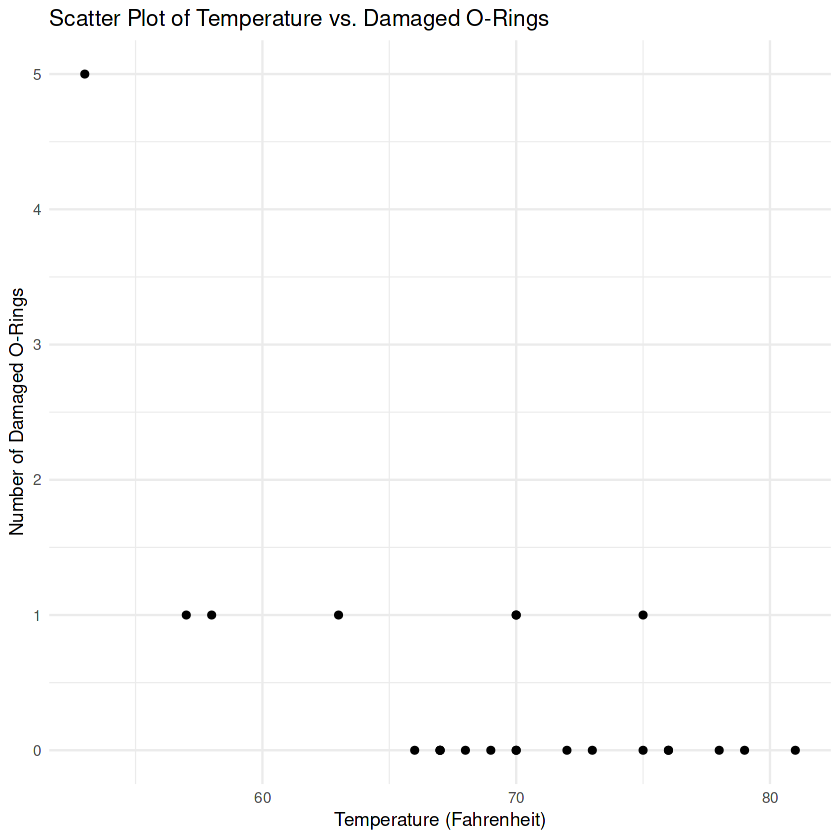

In [81]:
# Scatter plot of temperature vs. damage
ggplot(orings, aes(x = temp, y = damage)) +
  geom_point() +
  theme_minimal() +
  labs(title = "Scatter Plot of Temperature vs. Damaged O-Rings",
       x = "Temperature (Fahrenheit)",
       y = "Number of Damaged O-Rings")

In [82]:
y = cbind(c(orings$damage),c(6-orings$damage))
x = orings$temp

head(y)

5,1
1,5
1,5
1,5
0,6
0,6


In [83]:
# Fit the logistic regression model
logistic_model <- glm(y ~ x, family = binomial)
summary(logistic_model)


Call:
glm(formula = y ~ x, family = binomial)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 11.66299    3.29626   3.538 0.000403 ***
x           -0.21623    0.05318  -4.066 4.78e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 38.898  on 22  degrees of freedom
Residual deviance: 16.912  on 21  degrees of freedom
AIC: 33.675

Number of Fisher Scoring iterations: 6


In [84]:
# Exponentiate the coefficient of temperature
exp(coef(logistic_model))

(Intercept)            x 
1.161909e+05 8.055471e-01

In [85]:
# Fit a GAM model
gam_model <- gam(y ~ s(x), family = binomial)

# Summary of the GAM model
summary(gam_model)


Family: binomial 
Link function: logit 

Formula:
y ~ s(x)

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -3.1667     0.5189  -6.102 1.05e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
       edf Ref.df Chi.sq  p-value    
s(x) 1.926  2.423  19.03 0.000138 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.794   Deviance explained =   64%
UBRE = -0.13611  Scale est. = 1         n = 23

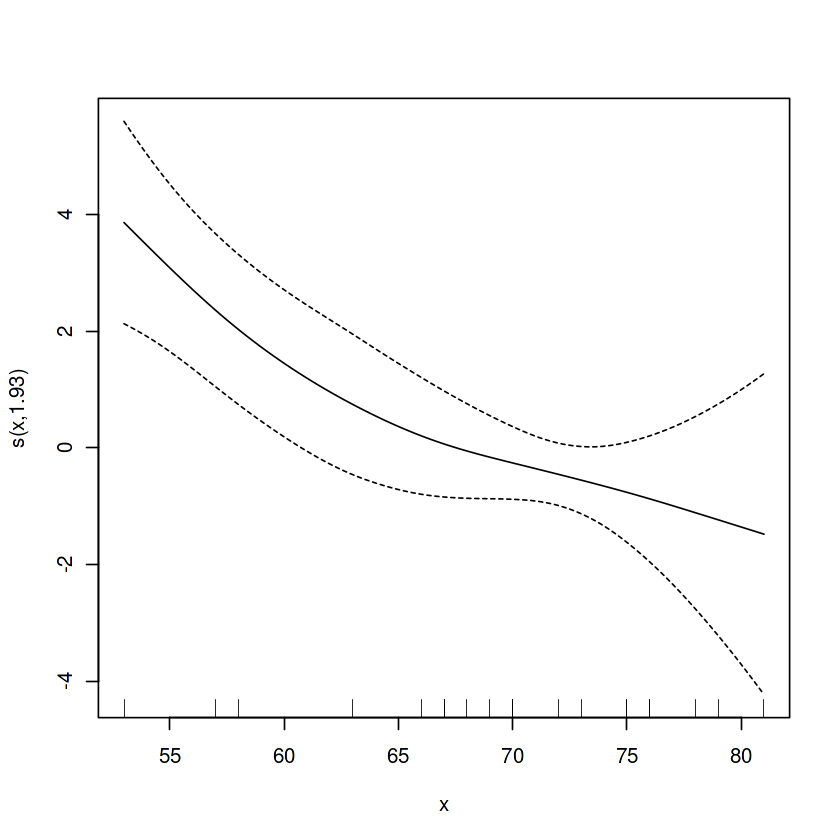

In [86]:
plot(gam_model)

In [87]:
paste('Logistic model AIC: ',AIC(logistic_model))
paste('Logistic-GAM model AIC: ',AIC(gam_model))

[1] "Logistic model AIC:  33.6747875044417"

[1] "Logistic-GAM model AIC:  32.6320173210407"

(More info on dataset: https://www.rdocumentation.org/packages/MASS/versions/7.3-61/topics/birthwt)

In [88]:
library(MASS)
data(birthwt)

head(birthwt)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
85,0,19,182,2,0,0,0,1,0,2523
86,0,33,155,3,0,0,0,0,3,2551
87,0,20,105,1,1,0,0,0,1,2557
88,0,21,108,1,1,0,0,1,2,2594
89,0,18,107,1,1,0,0,1,0,2600
91,0,21,124,3,0,0,0,0,0,2622


In [89]:
# TO DO
birthwt$low<-as.factor(birthwt$low)
birthwt$ht<-as.factor(birthwt$ht)
birthwt$ui<-as.factor(birthwt$ui)
birthwt$smoke<-as.factor(birthwt$smoke)

logit_birthwt <- glm( low ~ age + lwt + smoke + ht + ui, family = binomial, data= birthwt)
summary(logit_birthwt)


Call:
glm(formula = low ~ age + lwt + smoke + ht + ui, family = binomial, 
    data = birthwt)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept)  1.399794   1.080407   1.296   0.1951   
age         -0.034073   0.033674  -1.012   0.3116   
lwt         -0.015447   0.006587  -2.345   0.0190 * 
smoke1       0.647540   0.336650   1.923   0.0544 . 
ht1          1.893274   0.683392   2.770   0.0056 **
ui1          0.884607   0.444051   1.992   0.0464 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 234.67  on 188  degrees of freedom
Residual deviance: 211.78  on 183  degrees of freedom
AIC: 223.78

Number of Fisher Scoring iterations: 4


In [90]:
stepAIC(logit_birthwt, trace = 0) # stepwise model selection using AIC


Call:  glm(formula = low ~ lwt + smoke + ht + ui, family = binomial, 
    data = birthwt)

Coefficients:
(Intercept)          lwt       smoke1          ht1          ui1  
    0.72186     -0.01631      0.65300      1.92213      0.89627  

Degrees of Freedom: 188 Total (i.e. Null);  184 Residual
Null Deviance:	    234.7 
Residual Deviance: 212.8 	AIC: 222.8

In [91]:
stepAIC(logit_birthwt, k = log(nrow(birthwt)), trace = 0) # stepwise model selection using BIC instead


Call:  glm(formula = low ~ lwt + ht, family = binomial, data = birthwt)

Coefficients:
(Intercept)          lwt          ht1  
    1.45068     -0.01865      1.85551  

Degrees of Freedom: 188 Total (i.e. Null);  186 Residual
Null Deviance:	    234.7 
Residual Deviance: 221.1 	AIC: 227.1

----Other dataset----

(More info on dataset: https://rdrr.io/cran/UsingR/man/hall.fame.html)

In [92]:
library(UsingR)
data(hall.fame)

head(hall.fame)

,first,last,seasons,games,AB,runs,hits,doubles,triples,HR,⋯,ABRuns,Runs.Created,SB,CS,Stolen.Base.Runs,Fielding.Average,Fielding.Runs,Primary.Position.Played,Total.Player.Rating,Hall.Fame.Membership
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
1,HANK,AARON,23,3298,12364,2174,3771,624,98,755,⋯,902,2550,143,114,50,0.980,54,O,84.6,Select by writers
2,JERRY,ADAIR,13,1165,4019,378,1022,163,19,57,⋯,-113,376,178,64,30,0.985,-30,2,-6.6,not a member
3,SPARKY,ADAMS,13,1424,5557,844,1588,249,48,9,⋯,-133,679,59,89,NA,0.974,-37,2,-10.1,not a member
4,BOBBY,ADAMS,14,1281,4019,591,1082,188,49,37,⋯,-54,523,304,66,NA,0.955,10,3,-4.3,not a member
5,JOE,ADCOCK,17,1959,6606,823,1832,295,35,336,⋯,198,1033,108,60,NA,0.994,-28,1,6.3,not a member
6,TOMMIE,AGEE,12,1129,3912,558,999,170,27,130,⋯,34,507,72,123,44,0.975,19,O,0.0,not a member


In [93]:
summary(hall.fame)

    first               last              seasons          games       
 Length:1340        Length:1340        Min.   :10.00   Min.   : 140.0  
 Class :character   Class :character   1st Qu.:11.00   1st Qu.: 958.8  
 Mode  :character   Mode  :character   Median :13.00   Median :1282.5  
                                       Mean   :13.49   Mean   :1331.3  
                                       3rd Qu.:15.00   3rd Qu.:1651.5  
                                       Max.   :26.00   Max.   :3562.0  
                                                                       
       AB             runs             hits           doubles     
 Min.   :  252   Min.   :  20.0   Min.   :  48.0   Min.   :  6.0  
 1st Qu.: 2980   1st Qu.: 355.0   1st Qu.: 766.5   1st Qu.:116.0  
 Median : 4302   Median : 575.0   Median :1168.0   Median :184.5  
 Mean   : 4535   Mean   : 635.3   Mean   :1248.6   Mean   :203.2  
 3rd Qu.: 5815   3rd Qu.: 843.2   3rd Qu.:1613.0   3rd Qu.:264.0  
 Max.   :14053   Max. 

In [104]:
# TO DO
hall.fame$acc_hfm = hall.fame$Hall.Fame.Membership != "not a member" 

logit_hall.fame <- glm(acc_hfm ~ BA + HR + hits + games, family = binomial, data= hall.fame)
summary(logit_hall.fame)


Call:
glm(formula = acc_hfm ~ BA + HR + hits + games, family = binomial, 
    data = hall.fame)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.344e+01  3.667e+00  -6.393 1.63e-10 ***
BA           5.625e+01  1.179e+01   4.770 1.84e-06 ***
HR           3.948e-03  1.329e-03   2.970  0.00297 ** 
hits         1.923e-03  1.085e-03   1.772  0.07633 .  
games        7.024e-04  1.284e-03   0.547  0.58441    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 826.43  on 1339  degrees of freedom
Residual deviance: 380.14  on 1335  degrees of freedom
AIC: 390.14

Number of Fisher Scoring iterations: 8


In [95]:
stepAIC(logit_hall.fame,trace = 0)


Call:  glm(formula = acc_hfm ~ BA + HR + hits, family = binomial, data = hall.fame)

Coefficients:
(Intercept)           BA           HR         hits  
 -21.843762    51.212224     0.004285     0.002495  

Degrees of Freedom: 1339 Total (i.e. Null);  1336 Residual
Null Deviance:	    826.4 
Residual Deviance: 380.4 	AIC: 388.4

In [96]:
stepAIC(logit_hall.fame,trace = 0, k = log(nrow(hall.fame)))


Call:  glm(formula = acc_hfm ~ BA + HR + hits, family = binomial, data = hall.fame)

Coefficients:
(Intercept)           BA           HR         hits  
 -21.843762    51.212224     0.004285     0.002495  

Degrees of Freedom: 1339 Total (i.e. Null);  1336 Residual
Null Deviance:	    826.4 
Residual Deviance: 380.4 	AIC: 388.4

**Logistic regression with R, other exercise**

(More info on dataset: https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/esoph)

In [97]:
data(esoph)
head(esoph)

,agegp,alcgp,tobgp,ncases,ncontrols
,<ord>,<ord>,<ord>,<dbl>,<dbl>
1,25-34,0-39g/day,0-9g/day,0,40
2,25-34,0-39g/day,10-19,0,10
3,25-34,0-39g/day,20-29,0,6
4,25-34,0-39g/day,30+,0,5
5,25-34,40-79,0-9g/day,0,27
6,25-34,40-79,10-19,0,7


In [98]:
str(esoph)

'data.frame':	88 obs. of  5 variables:
 $ agegp    : Ord.factor w/ 6 levels "25-34"<"35-44"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ alcgp    : Ord.factor w/ 4 levels "0-39g/day"<"40-79"<..: 1 1 1 1 2 2 2 2 3 3 ...
 $ tobgp    : Ord.factor w/ 4 levels "0-9g/day"<"10-19"<..: 1 2 3 4 1 2 3 4 1 2 ...
 $ ncases   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ncontrols: num  40 10 6 5 27 7 4 7 2 1 ...


In [99]:
summary(esoph)

   agegp          alcgp         tobgp        ncases         ncontrols     
 25-34:15   0-39g/day:23   0-9g/day:24   Min.   : 0.000   Min.   : 0.000  
 35-44:15   40-79    :23   10-19   :24   1st Qu.: 0.000   1st Qu.: 1.000  
 45-54:16   80-119   :21   20-29   :20   Median : 1.000   Median : 4.000  
 55-64:16   120+     :21   30+     :20   Mean   : 2.273   Mean   : 8.807  
 65-74:15                                3rd Qu.: 4.000   3rd Qu.:10.000  
 75+  :11                                Max.   :17.000   Max.   :60.000  

In [100]:
# TO DO
res.full <- glm(cbind(ncases, ncontrols) ~ agegp + tobgp * alcgp,
data = esoph, family = binomial)

summary(res.full)


Call:
glm(formula = cbind(ncases, ncontrols) ~ agegp + tobgp * alcgp, 
    family = binomial, data = esoph)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -1.16933    0.20767  -5.631 1.79e-08 ***
agegp.L          3.97135    0.69286   5.732 9.94e-09 ***
agegp.Q         -1.58715    0.61943  -2.562   0.0104 *  
agegp.C          0.09866    0.47331   0.208   0.8349    
agegp^4          0.09950    0.32816   0.303   0.7617    
agegp^5         -0.27067    0.21516  -1.258   0.2084    
tobgp.L          1.10809    0.27042   4.098 4.17e-05 ***
tobgp.Q          0.26586    0.25419   1.046   0.2956    
tobgp.C          0.29394    0.24026   1.223   0.2212    
alcgp.L          2.42627    0.28829   8.416  < 2e-16 ***
alcgp.Q          0.12999    0.25418   0.511   0.6091    
alcgp.C          0.36600    0.22252   1.645   0.1000    
tobgp.L:alcgp.L -0.42942    0.58589  -0.733   0.4636    
tobgp.Q:alcgp.L  0.33676    0.56764   0.593   0.5530    
tobgp.C:alcgp.L -0.15

In [101]:
res.add <- glm(cbind(ncases, ncontrols) ~ agegp + tobgp + alcgp,
data = esoph, family = binomial)

summary(res.add)


Call:
glm(formula = cbind(ncases, ncontrols) ~ agegp + tobgp + alcgp, 
    family = binomial, data = esoph)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.19039    0.20737  -5.740 9.44e-09 ***
agegp.L      3.99663    0.69389   5.760 8.42e-09 ***
agegp.Q     -1.65741    0.62115  -2.668  0.00762 ** 
agegp.C      0.11094    0.46815   0.237  0.81267    
agegp^4      0.07892    0.32463   0.243  0.80792    
agegp^5     -0.26219    0.21337  -1.229  0.21915    
tobgp.L      1.11749    0.24014   4.653 3.26e-06 ***
tobgp.Q      0.34516    0.22414   1.540  0.12358    
tobgp.C      0.31692    0.21091   1.503  0.13294    
alcgp.L      2.53899    0.26385   9.623  < 2e-16 ***
alcgp.Q      0.09376    0.22419   0.418  0.67578    
alcgp.C      0.43930    0.18347   2.394  0.01665 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 367.953  on 87  degrees of freedom
Residua